# Comparing Different Approaches to Breast Cancer Ultrasound Diagnosis using Deep Learning


## Team Members
- Samantha Guillemette - ID: 26609198
- Saleha Tariq - ID: 40006997

# Librairies

In [10]:
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, LSTM
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Visualization

In [2]:
train_path= 'data/ultrasound breast classification/train'
test_path='data/ultrasound breast classification/val'

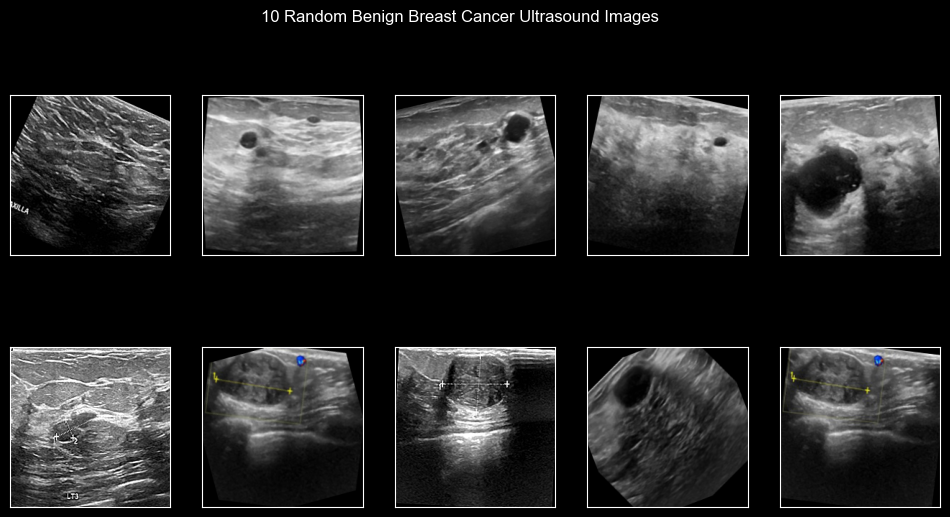

In [24]:
folder = train_path +"/benign"
data = os.listdir(folder)
random_images = random.sample(data, 10)

images = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image = os.path.join(folder, random_images[i])
    img = plt.imread(image)
    images.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Benign Breast Cancer Ultrasound Images")
plt.show()

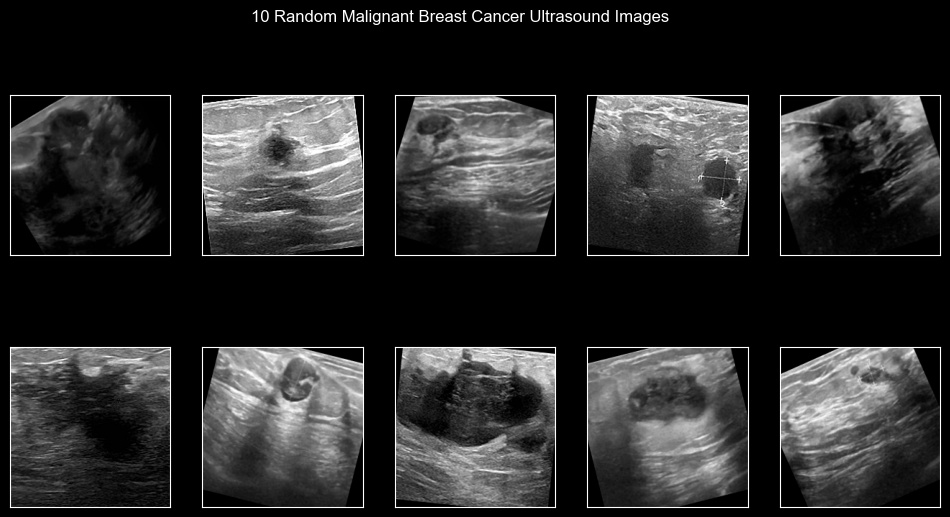

In [25]:
folder = train_path+"/malignant"
data = os.listdir(folder)
random_images = random.sample(data, 10)

images = []  # List to store image data

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    image = os.path.join(folder, random_images[i])
    img = plt.imread(image)
    images.append(img)  # Append image to list
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle("10 Random Malignant Breast Cancer Ultrasound Images")
plt.show()

# Data preparation & pre-processing

### Load Image Files for Training and Testing

In [5]:
image_types = [".png", ".jpg"]

# Get training list of files
train_benign = os.path.join(train_path, "benign")
training_benign_files = [os.path.join(train_benign, f) for f in os.listdir(train_benign) if os.path.splitext(f)[1].lower() in image_types]
train_malignant= os.path.join(train_path, "malignant")
train_malignant_files = [os.path.join(train_malignant, f) for f in os.listdir(train_malignant) if os.path.splitext(f)[1].lower() in image_types]

# Training sets
X_train = training_benign_files + train_malignant_files
y_train = np.concatenate([np.ones(len(training_benign_files)), np.zeros(len(train_malignant_files))])

# Get testing list of files
test_benign = os.path.join(test_path, "benign")
test_benign_files = [os.path.join(test_benign, f) for f in os.listdir(test_benign) if os.path.splitext(f)[1].lower() in image_types]
test_malignant= os.path.join(test_path, "malignant")
test_malignant_files = [os.path.join(test_malignant, f) for f in os.listdir(test_malignant) if os.path.splitext(f)[1].lower() in image_types]

# Testing sets
X_test = test_benign_files + test_malignant_files
y_test = np.concatenate([np.ones(len(test_benign_files)), np.zeros(len(test_malignant_files))])


### Training and Testing Set Visualization

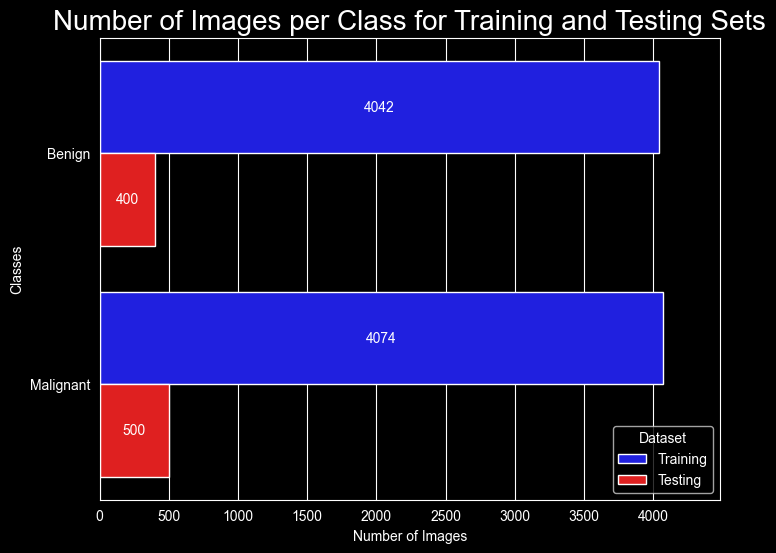

In [6]:
# Counts for Training and Testing sets
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

counts_df = pd.DataFrame({
    "Class": ["Benign", "Malignant"],
    "Training": train_counts[1],
    "Testing": test_counts[1]
})

# Melt the data frame into a long format
counts_melt = counts_df.melt(id_vars=["Class"], var_name="Dataset", value_name="Count")
colors = ["blue", "red"]
sns.set_style(style="darkgrid")
plt.style.use("dark_background")
fig = plt.figure(figsize=(8, 6))

ax = sns.barplot(x="Count", y="Class", hue="Dataset", data=counts_melt, palette=colors)
plt.xlabel("Number of Images")
plt.ylabel("Classes")
plt.xlim([0, max(counts_melt["Count"]) * 1.1])
for patch in ax.patches:
    height = patch.get_height()
    width = patch.get_width()
    x = patch.get_x() + width / 2
    y = patch.get_y() + height / 2
    ax.text(x, y, str(int(width)), ha="center", va="center")

plt.title("Number of Images per Class for Training and Testing Sets", fontdict={'size': 20})
plt.show()

### Normalize and Transform Images

In [12]:
def transform(list_of_images):
    images = []
    for image in list_of_images:
        img = plt.imread(image)
        # Resize to (160, 160, 3) shape
        resized = np.resize(img, (160, 160, 3))
        # Normalize to [0, 1] range
        normalized = resized / 255.0
        images.append(normalized)
    return np.array(images)

# Normalize image data
X_train_normalized = np.array(transform(X_train))
X_test_normalized = np.array(transform(X_test))

# Models

## Model 1 - Multilayer Perceptron

In [28]:
model = keras.Sequential([
    Flatten(input_shape=(160, 160, 3)),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Training the model for 20 epochs
history = model.fit(
    X_train_normalized,
    y_train,
    epochs=20,
    validation_data=(X_test_normalized, y_test),
)

Epoch 1/20
254/254 [==============================] - 7s 25ms/step - loss: 0.6587 - accuracy: 0.5858 - val_loss: 0.5895 - val_accuracy: 0.6389
Epoch 2/20
254/254 [==============================] - 5s 18ms/step - loss: 0.5947 - accuracy: 0.6634 - val_loss: 0.5576 - val_accuracy: 0.6944
Epoch 3/20
254/254 [==============================] - 5s 18ms/step - loss: 0.5525 - accuracy: 0.7008 - val_loss: 0.5838 - val_accuracy: 0.5989
Epoch 4/20
254/254 [==============================] - 5s 18ms/step - loss: 0.5535 - accuracy: 0.7135 - val_loss: 0.4758 - val_accuracy: 0.7633
Epoch 5/20
254/254 [==============================] - 5s 18ms/step - loss: 0.5324 - accuracy: 0.7303 - val_loss: 0.5293 - val_accuracy: 0.7156
Epoch 6/20
254/254 [==============================] - 5s 18ms/step - loss: 0.4991 - accuracy: 0.7469 - val_loss: 0.4721 - val_accuracy: 0.7344
Epoch 7/20
254/254 [==============================] - 5s 21ms/step - loss: 0.5000 - accuracy: 0.7469 - val_loss: 0.6586 - val_accuracy: 0.5556

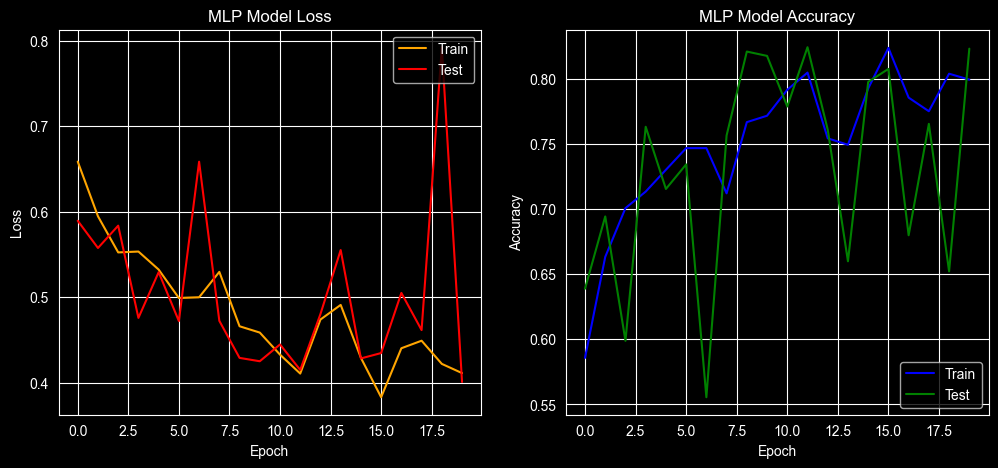

In [29]:
# Setting the figure size
plt.figure(figsize=(12, 5))

# Plotting training and validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='red')
plt.title('MLP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plotting training and validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('MLP Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()


## Model 2 - RNN

In [59]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape(target_shape=(160, 160 * 3)),
    tf.keras.layers.SimpleRNN(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compiling the model
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

# Training the model for 20 epochs
history = model.fit(
    X_train_normalized,
    y_train,
    epochs=20,
    validation_data=(X_test_normalized, y_test),
)

Epoch 1/20
254/254 [==============================] - 12s 43ms/step - loss: 0.6221 - accuracy: 0.6089 - val_loss: 0.6066 - val_accuracy: 0.6278
Epoch 2/20
254/254 [==============================] - 8s 32ms/step - loss: 0.6028 - accuracy: 0.6508 - val_loss: 0.6242 - val_accuracy: 0.5722
Epoch 3/20
254/254 [==============================] - 8s 32ms/step - loss: 0.5895 - accuracy: 0.6663 - val_loss: 0.5791 - val_accuracy: 0.7111
Epoch 4/20
254/254 [==============================] - 8s 32ms/step - loss: 0.5831 - accuracy: 0.6718 - val_loss: 0.7632 - val_accuracy: 0.5578
Epoch 5/20
254/254 [==============================] - 8s 33ms/step - loss: 0.6250 - accuracy: 0.6131 - val_loss: 0.5979 - val_accuracy: 0.6778
Epoch 6/20
254/254 [==============================] - 8s 33ms/step - loss: 0.6024 - accuracy: 0.6402 - val_loss: 0.5908 - val_accuracy: 0.7244
Epoch 7/20
254/254 [==============================] - 9s 34ms/step - loss: 0.5962 - accuracy: 0.6433 - val_loss: 0.5836 - val_accuracy: 0.651

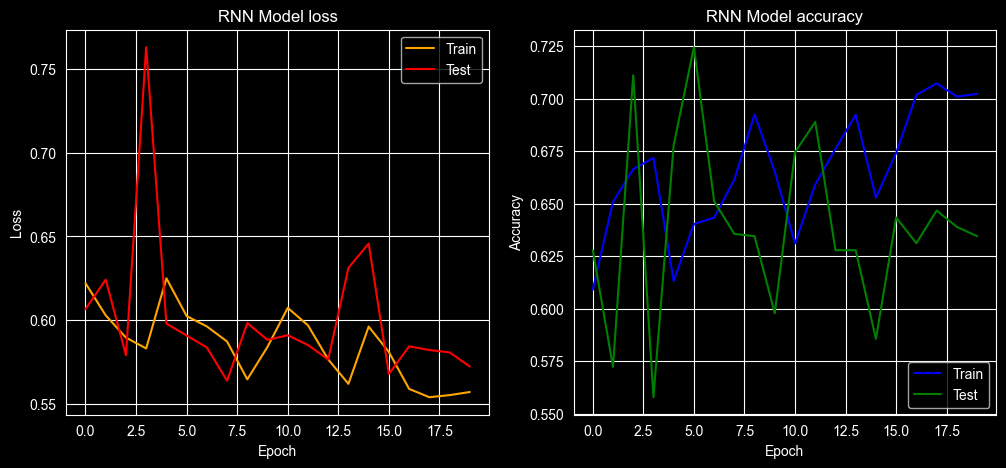

In [65]:
# Setting the figure size
plt.figure(figsize=(12, 5))

# Plotting training and validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='orange')
plt.plot(history.history['val_loss'], color='red')
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plotting training and validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='blue')
plt.plot(history.history['val_accuracy'], color='green')
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

plt.show()

## Model 3 - K-Nearest Neighbours

In [92]:
# Reshaping
X_train_normal = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_normal = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Creating a KNN classifier with k = 3
knn = KNeighborsClassifier(n_neighbors = 3)

# Training the classifier on the training data
knn.fit(X_train_normal, y_train)

# Making predictions on the test data
y_pred = knn.predict(X_test_normal)

# Printing classification report
print(classification_report(y_test, y_pred))

# Performance of the classifier using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("K-Nearest Neighbours Model Accuracy: {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

         0.0       0.63      0.87      0.73       400
         1.0       0.85      0.59      0.70       500

    accuracy                           0.71       900
   macro avg       0.74      0.73      0.71       900
weighted avg       0.75      0.71      0.71       900

K-Nearest Neighbours Model Accuracy: 71.33%


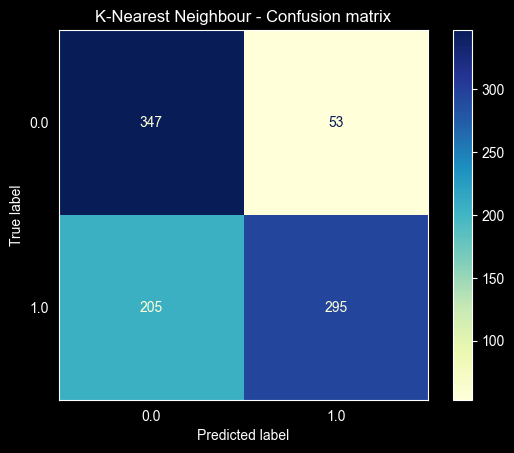

In [93]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap='YlGnBu')

# Adding the title
plt.title('K-Nearest Neighbour - Confusion matrix')

plt.grid(False)
plt.show()

## Model 4 - Random Forest

In [90]:
# Reshaping
X_train_normal = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_normal = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Creating a Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier using the training data
rfc.fit(X_train_normal, y_train)

# Making predictions on the test data
y_pred = rfc.predict(X_test_normal)

# Printing classification report
print(classification_report(y_test, y_pred))

# Performance of the classifier using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Model Accuracy: {:.2f}%".format(accuracy*100))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       400
         1.0       0.83      0.88      0.86       500

    accuracy                           0.84       900
   macro avg       0.84      0.83      0.83       900
weighted avg       0.84      0.84      0.83       900

Random Forest Model Accuracy: 83.56%


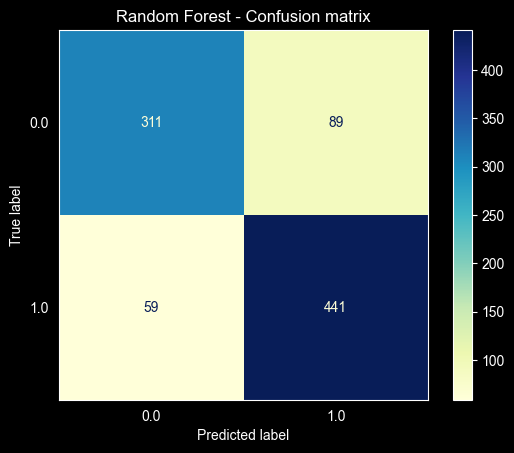

In [91]:
# Creating the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=rfc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc.classes_)
disp.plot(cmap='YlGnBu')

# Adding the title
plt.title('Random Forest - Confusion matrix')

plt.grid(False)
plt.show()

# Evaluate Models